# SPACEc: ML-enabled cell type annotation

After preprocessing the single-cell data, the next step is to assign cell types. SPACEc utilizes the linear SVM model to train and classify to annotate cell types if training data is available.

## Set up environment

In [1]:
import subprocess

def install_stellar(CUDA=12):
    if CUDA == 12:
        subprocess.run(["pip3", "install", "torch"], check=True)
        subprocess.run(["pip", "install", "torch_geometric"], check=True)
        subprocess.run(["pip", "install", "pyg_lib", "torch_scatter", "torch_sparse", "torch_cluster", "torch_spline_conv", "-f", "https://data.pyg.org/whl/torch-2.3.0+cu121.html"], check=True)
    elif CUDA == 11.8:
        subprocess.run(["pip3", "install", "torch", "--index-url", "https://download.pytorch.org/whl/cu118"], check=True)
        subprocess.run(["pip", "install", "torch_geometric"], check=True)
        subprocess.run(["pip", "install", "pyg_lib", "torch_scatter", "torch_sparse", "torch_cluster", "torch_spline_conv", "-f", "https://data.pyg.org/whl/torch-2.3.0+cu118.html"], check=True)
    else:
        print("Please choose between CUDA 12 or 11.8")
        print("If neither is working for you check the installation guide at: https://pytorch.org/get-started/locally/ and https://pytorch-geometric.readthedocs.io/en/latest/install/installation.html")

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import spacec first
import spacec as sp

#import standard packages
import os
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import seaborn as sns
import sys
import os
from git import Repo
import anndata

# silencing warnings
import warnings
warnings.filterwarnings('ignore')

INFO:root: * TissUUmaps version: 3.1.1.6


In [3]:
root_path = pathlib.Path("/home/tim/Dokumente/GitHub/SPACEc/") # replace with your path
data_path = root_path / 'example_data/raw/' # where the data is stored

# where you want to store the output
output_dir = root_path / 'example_data/output/'
output_dir.mkdir(exist_ok=True, parents=True)

# STELLAR path
STELLAR_path = root_path / 'example_data/STELLAR/'

# Test if the path exists, if not create it
if not STELLAR_path.exists():
    STELLAR_path.mkdir(exist_ok=True, parents=True)
    repo_url = 'https://github.com/snap-stanford/stellar.git'
    Repo.clone_from(repo_url, STELLAR_path)

In [4]:
sc.settings.set_figure_params(dpi=80, facecolor='white')

## Data Explanation
Annotated tonsil data is used as training & test data. </br>
Tonsillitis data is used as validation data.

In [5]:
# Load training data
adata = sc.read(output_dir / "adata_nn_demo_annotated.h5ad")
adata_train = adata[adata.obs['condition'] == 'tonsil']
adata_val  = adata[adata.obs['condition'] == 'tonsillitis']

## 3.1 Training

In [6]:
import numpy as np
np.isnan(adata_train.X).sum()

0

In [7]:
# downsample the data
adata_train = adata_train[0:1000, :]
adata_val = adata_val[0:1000, :]

In [8]:
adata_new = sp.tl.adata_stellar(adata_train, 
               adata_val, 
               celltype_col = "cell_type", 
               x_col = 'x', 
               y_col = 'y', 
               sample_rate = 0.5, 
               distance_thres = 50,
               STELLAR_path = STELLAR_path)

Preparing input data
Building dataset
Running STELLAR
         Falling back to preprocessing with `sc.pp.pca` and default params.


Computing METIS partitioning...
Done!


Loss: 1.901456


Computing METIS partitioning...
Done!


Loss: 0.847661


Computing METIS partitioning...
Done!


Loss: 0.625557


Computing METIS partitioning...
Done!


Loss: 0.522135


Computing METIS partitioning...
Done!


Loss: 0.455753


Computing METIS partitioning...
Done!


Loss: 0.408813


Computing METIS partitioning...
Done!


Loss: 0.367521


Computing METIS partitioning...
Done!


Loss: 0.336934


Computing METIS partitioning...
Done!


Loss: 0.312248


Computing METIS partitioning...
Done!


Loss: 0.292331


Computing METIS partitioning...
Done!


Loss: 0.276764


Computing METIS partitioning...
Done!


Loss: 0.268333


Computing METIS partitioning...
Done!


Loss: 0.256225


Computing METIS partitioning...
Done!


Loss: 0.247118


Computing METIS partitioning...
Done!


Loss: 0.240258


Computing METIS partitioning...
Done!


Loss: 0.234280


Computing METIS partitioning...
Done!


Loss: 0.229137


Computing METIS partitioning...
Done!


Loss: 0.226854


Computing METIS partitioning...
Done!


Loss: 0.223263


Computing METIS partitioning...
Done!


Loss: 0.221879


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.126901


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.909258


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.280982


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.295996


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.195334


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.244367


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.175855


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.139200


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.162556


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.132241


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.085322


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.138576


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.047551


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.026066


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.075626


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.122315


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.034378


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.062769


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.017856


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.013479


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.140070


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.021161


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.006341


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.006325


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.006301


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.030901


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.069114


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.014008


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.015618


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.058501


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.061282


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.030656


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.033795


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.002958


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.053181


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: 0.009877


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.035909


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.013769


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.072398


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.027999


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.042118


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.030300


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.043187


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.032641


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.033982


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.071559


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.050425


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.038178


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.027217


Computing METIS partitioning...
Done!
Computing METIS partitioning...
Done!


Loss: -0.068394


NameError: name 'anndata' is not defined

['B cell', 'CD4+ T cell', 'CD8+ T cell', 'DC', 'Epithelial cell', ..., 'NK cell', 'Plasma cell', 'Treg', 'Vessel', 'cDC1']
Length: 14
Categories (14, object): ['B cell', 'CD4+ T cell', 'CD8+ T cell', 'DC', ..., 'Plasma cell', 'Treg', 'Vessel', 'cDC1']
Training now!
Evaluating now!


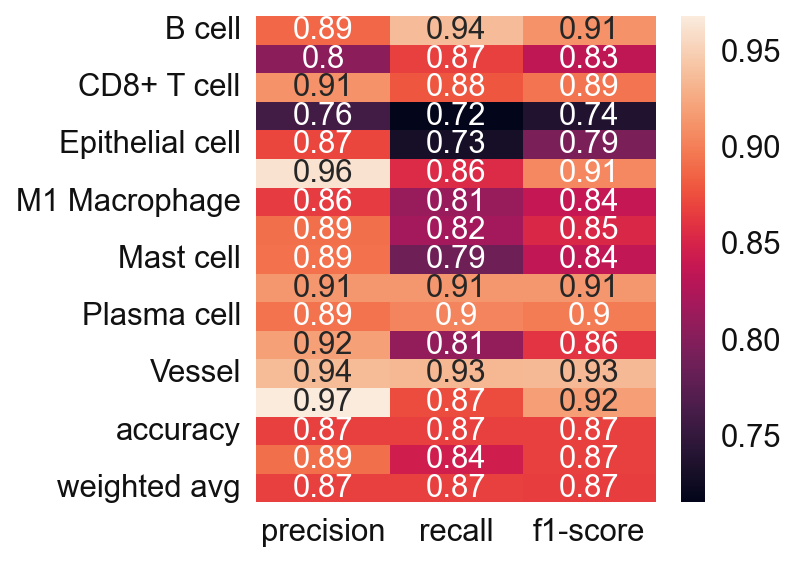

: 

In [ ]:
svc = sp.tl.ml_train(
    adata_train=adata_train,
    label='cell_type',
    nan_policy_y='omit')

In [ ]:
sp.tl.ml_predict(
    adata_val = adata_val,
    svc = svc,
    save_name = "svm_pred")

Classifying!
Saving cell type labels to adata!


: 

... storing 'svm_pred' as categorical


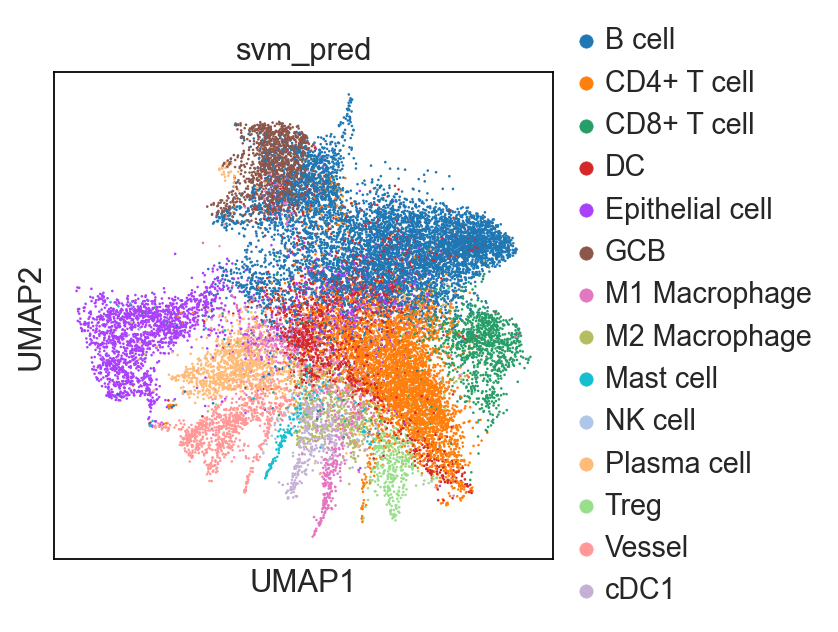

: 

In [ ]:
sc.pl.umap(adata_val, color = 'svm_pred')

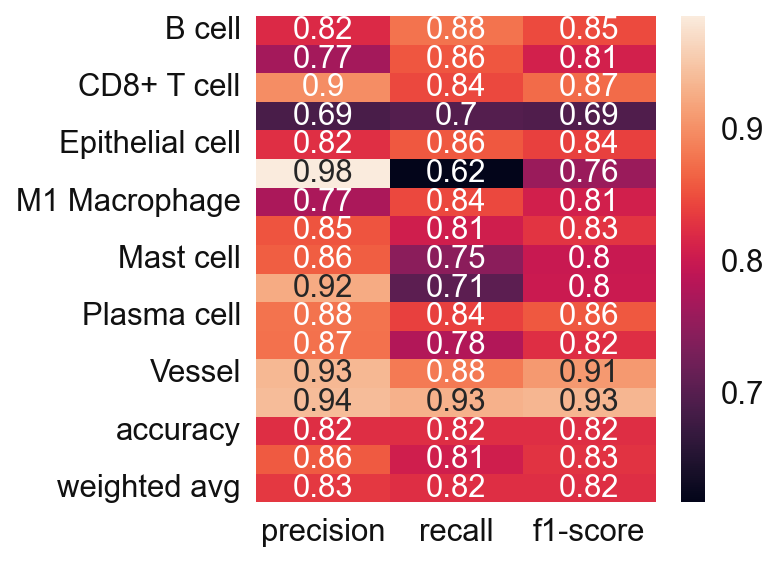

: 

In [ ]:
# Since we also know the cell type annotation of the adata_val, we can check in this case
from sklearn.metrics import classification_report

y_true = adata_val.obs['cell_type'].values
y_pred = adata_val.obs['svm_pred'].values
nan_mask = ~y_true.isna()
y_true = y_true[nan_mask]
y_pred = y_pred[nan_mask]

svm_eval = classification_report(
    y_true = y_true, 
    y_pred = y_pred, 
    target_names=svc.classes_, 
    output_dict=True)
sns.heatmap(
    pd.DataFrame(svm_eval).iloc[:-1, :].T, 
    annot=True)
plt.show()

### 3.4 Save model

In [ ]:
import pickle
filename = 'svc_model.sav'
pickle.dump(svc, open(output_dir / filename, 'wb'))
#adata_val.write(output_dir + "adata_nn_ml_demo_annotated.h5ad")

: 

## 3.5 Single-cell visualzation

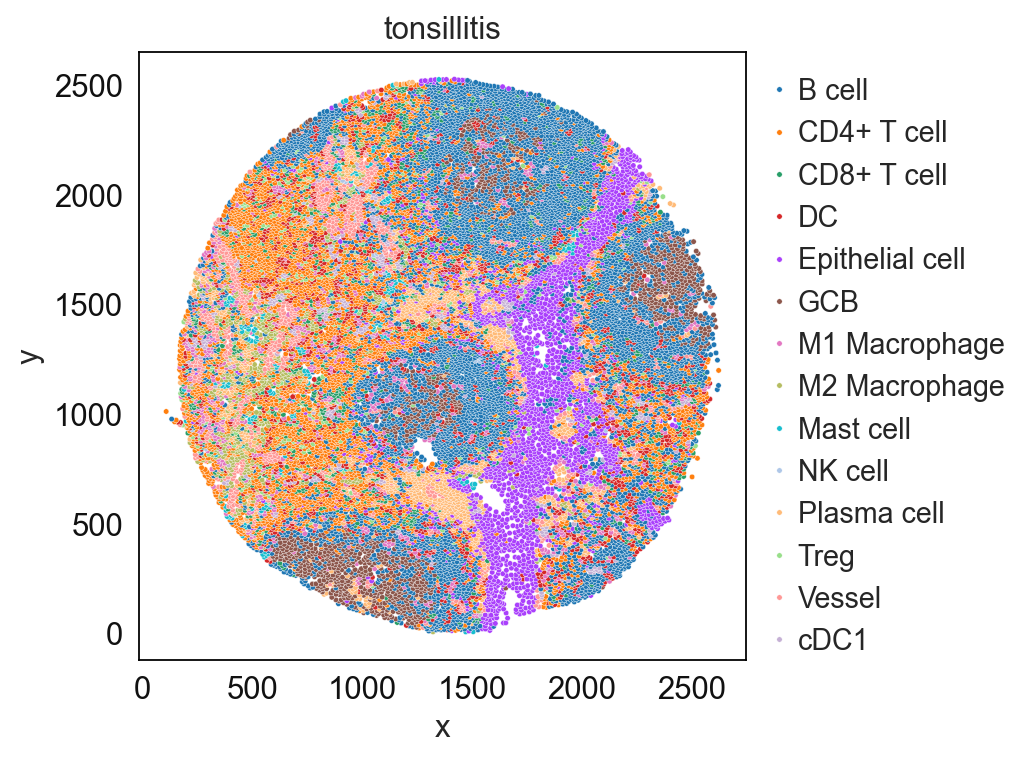

: 

In [ ]:
sp.pl.catplot(
    adata_val, color = "svm_pred", # specify group column name here e.g. celltype_fine)
    unique_region = "condition", # specify unique_regions here
    X='x', Y='y', # specify x and y columns here
    n_columns=1, # adjust the number of columns for plotting here (how many plots do you want in one row?)
    palette=None, #default is None which means the color comes from the anndata.uns that matches the UMAP
    savefig=False, # save figure as pdf
    output_fname = "", # change it to file name you prefer when saving the figure
    output_dir=output_dir, # specify output directory here (if savefig=True)
)

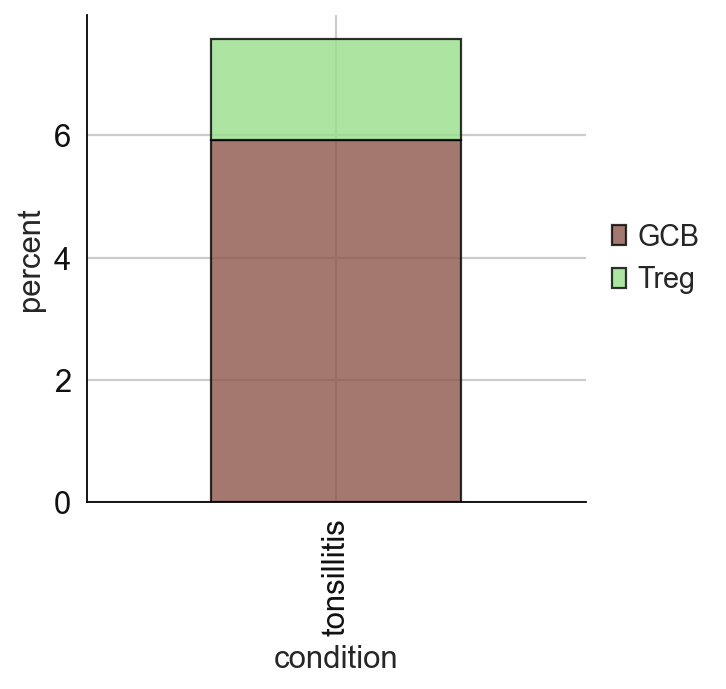

: 

In [ ]:
# cell type percentage tab and visualization [much few]
ct_perc_tab, _ = sp.pl.stacked_bar_plot(
    adata = adata_val, # adata object to use 
    color = 'svm_pred', # column containing the categories that are used to fill the bar plot
    grouping = 'condition', # column containing a grouping variable (usually a condition or cell group) 
    cell_list = ['GCB', 'Treg'],  # list of cell types to plot, you can also see the entire cell types adata.obs['celltype_fine'].unique()
    palette=None, #default is None which means the color comes from the anndata.uns that matches the UMAP
    savefig=False, # change it to true if you want to save the figure
    output_fname = "", # change it to file name you prefer when saving the figure
    output_dir = output_dir, #output directory for the figure
    norm = False, # if True, then whatever plotted will be scaled to sum of 1
    fig_sizing=(4,4)
)

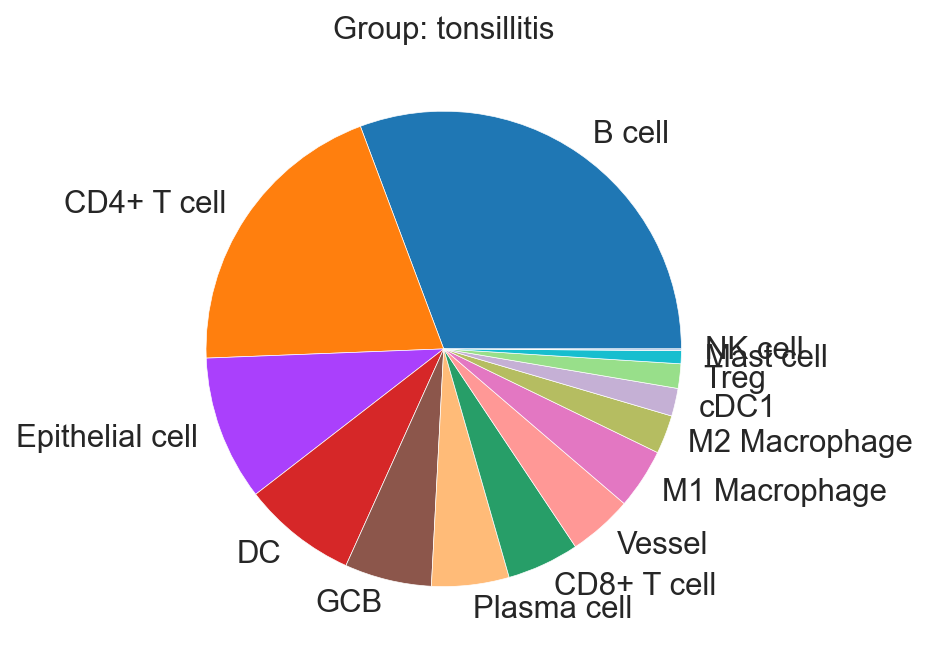

: 

In [ ]:
sp.pl.create_pie_charts(
    adata_val,
    color = "svm_pred", 
    grouping = "condition", 
    show_percentages=False,
    palette=None, #default is None which means the color comes from the anndata.uns that matches the UMAP
    savefig=False, # change it to true if you want to save the figure
    output_fname = "", # change it to file name you prefer when saving the figure
    output_dir = output_dir #output directory for the figure
)